<a href="https://colab.research.google.com/github/GeorgeTak/Diploma-thesis/blob/main/NACC_process(part_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving nacc_csv(1_3200_patients_processed).csv to nacc_csv(1_3200_patients_processed).csv


In [ ]:
import pandas as pd

nacc_csv = pd.read_csv('nacc_csv(1_3200_patients_processed).csv')
nacc_csv.describe().round(2)#Have a look at dataset's content. All the values were rounded to 2 decimals places.

,age,sex,education,hypertension,diabetes,depression,stroke history,craft story verbatim recall score,moca,trail making test,smoking_years,alcohol_occasions,alcohol_frequency,memory problems,home hobbies,personal care,parkinsonian gait,cdr_global
count,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00,3199.00
mean,69.76,0.47,17.92,0.41,0.15,0.26,0.07,48.93,25.74,364.14,6.87,0.93,6.88,0.74,0.46,0.24,0.08,0.53
std,11.08,0.50,12.83,0.76,0.82,1.01,0.62,39.79,13.49,402.17,19.26,0.97,2.38,1.89,0.75,0.63,0.64,0.65
min,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,63.00,0.00,14.00,0.00,0.00,0.00,0.00,15.00,23.00,70.00,0.00,1.00,8.00,0.00,0.00,0.00,0.00,0.00
50%,71.00,0.00,16.00,0.00,0.00,0.00,0.00,25.00,25.00,122.00,0.00,1.00,8.00,0.00,0.00,0.00,0.00,0.50
75%,78.00,1.00,18.00,1.00,0.00,0.00,0.00,97.00,26.00,996.00,0.00,1.00,8.00,1.00,1.00,0.00,0.00,0.50
max,97.00,1.00,99.00,8.00,9.00,9.00,9.00,98.00,88.00,998.00,99.00,9.00,9.00,9.00,3.00,3.00,8.00,3.00


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

#Input labels/features
input_features = [
    'age', 'sex', 'education',
    'hypertension', 'diabetes', 'depression', 'stroke history',
    'craft story verbatim recall score', 'moca', 'trail making test',
    'smoking_years', 'alcohol_occasions', 'alcohol_frequency',
    'memory problems', 'home hobbies', 'personal care', 'parkinsonian gait'
]
output_label = 'cdr_global'  # Binary target (e.g., 0 = no dementia, ≥2.0 = dementia)

X = nacc_csv[input_features]
nacc_csv[output_label] = (nacc_csv[output_label] >= 2.0).astype(int)
y = nacc_csv[output_label]

scaler = MinMaxScaler()  # Use of Min-max scaler
X_scaled = scaler.fit_transform(X)
#Train - validate - test :80% - 10% - 10%
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.10, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

#borderline_smote_v2 = BorderlineSMOTE(kind='borderline-2', random_state=42)
smote = SMOTE(k_neighbors=7,random_state=42)# Use of SMOTE
#smote = SMOTE(k_neighbors=10, sampling_strategy=0.75)
#SMOTEENN()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution
print("Original dataset shape:", Counter(y))
print("Training set shape after resampling:", Counter(y_train_resampled))
print("Train size:", len(X_train_resampled))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Original dataset shape: Counter({1: 1889, 0: 1310})
Training set shape after resampling: Counter({1: 1511, 0: 1511})
Train size: 3022
Validation size: 320
Test size: 320


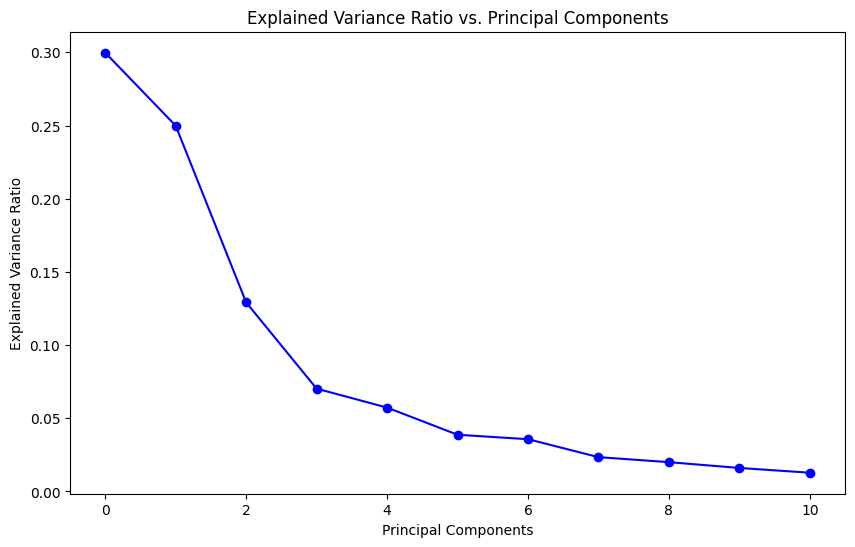

Original number of features: 17
Number of principal components: 11
Explained variance ratio: [0.29975354 0.24985871 0.12911627 0.07020662 0.05726119 0.03871127
 0.03566504 0.02341266 0.01997223 0.01601351 0.01275759]


In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
#Use of PCA in training ,validation and testing sets . Keeping the 95% of the most important features.
#0.80 is a good choice - applied on SVM

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='-', color='b')
plt.title('Explained Variance Ratio vs. Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.show()

print("Original number of features:", X_train_resampled.shape[1])
print("Number of principal components:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score

def evaluate_with_cv(X, y, model,label,cv_splits):
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    metrics = {
        'Accuracy': cross_val_score(model, X, y, cv=skf, scoring='accuracy'),
        'Precision': cross_val_score(model, X, y, cv=skf, scoring='precision'),
        'Recall': cross_val_score(model, X, y, cv=skf, scoring='recall'),
        'F1-Score': cross_val_score(model, X, y, cv=skf, scoring='f1'),
        'ROC AUC': cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    }

    # Convert to percentage and create DataFrame
    metrics_percent = {k: 100 * v for k, v in metrics.items()}
    df = pd.DataFrame(metrics_percent).T  # Transpose to have metrics as rows
    df.columns = [f'Fold {i+1}' for i in range(cv_splits)]
    df['Mean'] = df.mean(axis=1)

    # Round to 2 decimal places
    df = df.round(2)

    print(f"Cross-validation metrics (%)({label} set):")
    #print(df.to_string())

    return df


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(C=100, gamma=0.1,kernel='rbf', probability=True)
evaluate_with_cv(X_train_pca, y_train_resampled, svm_model,"Training",cv_splits=5)#PCA(0.8)

Cross-validation metrics (%)(Training set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Accuracy,88.60,84.46,83.44,84.11,86.42,85.41
Precision,95.70,93.33,93.53,96.82,94.72,94.82
Recall,80.86,74.17,71.85,70.53,77.15,74.91
F1-Score,87.66,82.66,81.27,81.61,85.04,83.65
ROC AUC,93.11,93.74,89.59,92.64,93.52,92.52


In [ ]:
evaluate_with_cv(X_val_pca, y_val, svm_model,"Validation",cv_splits=5)#PCA(0.8)

Cross-validation metrics (%)(Validation set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Accuracy,79.69,82.81,92.19,90.62,65.62,82.19
Precision,100.00,90.91,100.00,94.44,89.47,94.97
Recall,65.79,78.95,86.84,89.47,45.95,73.40
F1-Score,79.37,84.51,92.96,91.89,60.71,81.89
ROC AUC,88.56,89.07,94.84,95.04,79.58,89.42


In [ ]:
evaluate_with_cv(X_test_pca, y_test, svm_model,"Test",cv_splits=5)#PCA(0.8)

Cross-validation metrics (%)(Test set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Accuracy,82.81,75.00,85.94,84.38,89.06,83.44
Precision,86.49,89.29,96.77,100.00,96.88,93.88
Recall,84.21,65.79,78.95,73.68,83.78,77.28
F1-Score,85.33,75.76,86.96,84.85,89.86,84.55
ROC AUC,90.69,89.27,90.08,93.72,94.39,91.63


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rf_model = RandomForestClassifier(
    bootstrap=True,
    criterion='gini',
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=60,
    min_samples_split=3,
    n_estimators=900,
    random_state=42,
    class_weight=None
)
#RFE selection with step = 1
rfe = RFE(estimator=rf_model, n_features_to_select=11, step=1)
rfe.fit(X_train_resampled, y_train_resampled)


#RFE selection to all the sets
X_train_rfe = rfe.transform(X_train_resampled)
X_val_rfe = rfe.transform(X_val)
X_test_rfe = rfe.transform(X_test)

selected_feature_indices = rfe.get_support(indices=True)
print("Selected feature indices:", selected_feature_indices)
print("Selected feature names:", [input_features[i] for i in selected_feature_indices])


evaluate_with_cv(X_train_rfe, y_train_resampled, rf_model,"Training",cv_splits=5)#RFE applied with 11 features with step =  1/Also good with 6 features(step=1)/Good expirement 14 features with step=2

Selected feature indices: [ 0  1  2  3  5  7  8  9 13 14 15]
Selected feature names: ['age', 'sex', 'education', 'hypertension', 'depression', 'craft story verbatim recall score', 'moca', 'trail making test', 'memory problems', 'home hobbies', 'personal care']
Cross-validation metrics (%)(Training set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Accuracy,87.44,86.78,85.26,85.76,87.09,86.47
Precision,90.97,94.05,93.47,92.52,92.75,92.75
Recall,83.17,78.48,75.83,77.81,80.46,79.15
F1-Score,86.90,85.56,83.73,84.53,86.17,85.38
ROC AUC,93.58,94.10,91.86,92.96,94.15,93.33


In [ ]:
evaluate_with_cv(X_val_rfe, y_val, rf_model,"Validation",cv_splits=6)#RFE applied with 11 features/Also good with 6 features

Cross-validation metrics (%)(Validation set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Mean
Accuracy,83.33,81.48,75.47,84.91,83.02,77.36,80.93
Precision,96.00,80.56,75.68,81.08,82.35,85.19,83.48
Recall,75.00,90.62,87.50,96.77,90.32,74.19,85.74
F1-Score,84.21,85.29,81.16,88.24,86.15,79.31,84.06
ROC AUC,88.78,92.76,90.92,97.65,91.50,81.23,90.47


In [ ]:
evaluate_with_cv(X_test_rfe, y_test, rf_model,"Test",cv_splits=7)#RFE applied with 11 features /Also good with 6 features

Cross-validation metrics (%)(Test set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Mean
Accuracy,80.43,78.26,82.61,69.57,78.26,88.89,84.44,80.35
Precision,80.00,75.76,85.19,68.57,75.76,92.31,83.33,80.13
Recall,88.89,92.59,85.19,88.89,92.59,88.89,92.59,89.95
F1-Score,84.21,83.33,85.19,77.42,83.33,90.57,87.72,84.54
ROC AUC,92.59,91.62,88.40,88.50,90.64,94.24,94.65,91.52


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    colsample_bytree = 1.0,
    gamma = 0.13,
    learning_rate = 0.30,
    max_depth = 1,
    min_child_weight = 4,
    n_estimators = 350,
    subsample= 0.85
)
evaluate_with_cv(X_train_pca, y_train_resampled, xgb_model,"Training",cv_splits=5)#PCA(0.85)

Cross-validation metrics (%)(Training set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Accuracy,87.11,84.63,83.77,84.77,86.09,85.27
Precision,90.32,89.43,89.84,90.70,90.37,90.13
Recall,83.17,78.48,76.16,77.48,80.79,79.22
F1-Score,86.60,83.60,82.44,83.57,85.31,84.30
ROC AUC,92.00,92.36,90.80,91.83,93.69,92.14


In [ ]:
evaluate_with_cv(X_val_pca, y_val, xgb_model,"Validation",cv_splits=5)#PCA(0.85)

Cross-validation metrics (%)(Validation set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Accuracy,79.69,82.81,92.19,81.25,71.88,81.56
Precision,93.10,84.62,94.59,84.21,85.19,88.34
Recall,71.05,86.84,92.11,84.21,62.16,79.27
F1-Score,80.60,85.71,93.33,84.21,71.88,83.15
ROC AUC,84.62,89.98,96.15,91.30,79.38,88.28


In [ ]:
evaluate_with_cv(X_test_pca, y_test, xgb_model,"Test",cv_splits=5)#PCA(0.85)

Cross-validation metrics (%)(Test set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Accuracy,85.94,78.12,75.00,73.44,89.06,80.31
Precision,87.18,85.29,80.56,75.61,89.47,83.62
Recall,89.47,76.32,76.32,81.58,91.89,83.12
F1-Score,88.31,80.56,78.38,78.48,90.67,83.28
ROC AUC,91.70,84.21,84.11,87.25,95.40,88.53


In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

lr_model = LogisticRegression(
     penalty='elasticnet',
      C=2,
      l1_ratio=0.9,
      max_iter=100,
      class_weight=None,
      solver='saga',
      random_state=42
)
evaluate_with_cv(X_train_pca, y_train_resampled, lr_model,"Training",cv_splits=5)#PCA(0.85)

Cross-validation metrics (%)(Training set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Accuracy,86.28,82.81,80.96,81.79,83.44,83.06
Precision,97.41,96.70,94.74,93.64,95.91,95.68
Recall,74.59,67.88,65.56,68.21,69.87,69.22
F1-Score,84.49,79.77,77.50,78.93,80.84,80.30
ROC AUC,91.28,91.31,88.09,88.22,89.96,89.77


In [ ]:
evaluate_with_cv(X_val_pca, y_val, lr_model,"Validation",cv_splits=5)#PCA(0.85)

Cross-validation metrics (%)(Validation set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Accuracy,76.56,81.25,87.50,82.81,70.31,79.69
Precision,96.00,88.24,89.47,86.49,84.62,88.96
Recall,63.16,78.95,89.47,84.21,59.46,75.05
F1-Score,76.19,83.33,89.47,85.33,69.84,80.83
ROC AUC,85.53,87.45,93.52,92.61,73.87,86.60


In [ ]:
evaluate_with_cv(X_test_pca, y_test, lr_model,"Test",cv_splits=6)#PCA(0.85)

Cross-validation metrics (%)(Test set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Mean
Accuracy,77.78,85.19,71.70,79.25,86.79,83.02,80.62
Precision,83.33,92.86,90.48,88.46,96.15,92.31,90.60
Recall,78.12,81.25,59.38,74.19,80.65,77.42,75.17
F1-Score,80.65,86.67,71.70,80.70,87.72,84.21,81.94
ROC AUC,87.50,91.34,85.86,86.95,91.64,91.64,89.16


In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    boosting_type='gbdt',
    reg_lambda=1,
    reg_alpha=0,
    path_smooth=0,
    num_leaves=255,
    n_estimators=1000,
    min_sum_hessian_in_leaf=0.1,
    min_child_samples=30,
    max_depth=11,
    learning_rate=0.3,
    feature_fraction=1.0,
    bagging_freq=3,
    bagging_fraction=0.7,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
evaluate_with_cv(X_train_pca, y_train_resampled, lgbm_model,"Training",cv_splits=6)#PCA(0.85)

Cross-validation metrics (%)(Training set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Mean
Accuracy,84.92,85.12,84.72,84.72,85.09,87.87,85.41
Precision,84.92,87.66,87.23,86.01,88.65,92.04,87.75
Recall,84.92,81.75,81.35,82.94,80.56,82.87,82.40
F1-Score,84.92,84.60,84.19,84.44,84.41,87.21,84.96
ROC AUC,92.58,91.98,91.34,92.16,92.05,92.45,92.09


In [ ]:
evaluate_with_cv(X_val_pca, y_val, lgbm_model,"Validation",cv_splits=6)#PCA(0.85)

Cross-validation metrics (%)(Validation set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Mean
Accuracy,83.33,81.48,77.36,92.45,83.02,73.58,81.87
Precision,100.00,80.56,85.71,90.91,84.38,84.00,87.59
Recall,71.88,90.62,75.00,96.77,87.10,67.74,81.52
F1-Score,83.64,85.29,80.00,93.75,85.71,75.00,83.90
ROC AUC,91.05,90.91,86.46,95.75,87.54,82.99,89.12


In [ ]:
evaluate_with_cv(X_test_pca,y_test, lgbm_model,"Test",cv_splits=6)#PCA(0.85)

Cross-validation metrics (%)(Test set):


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Mean
Accuracy,85.19,83.33,75.47,73.58,81.13,90.57,81.55
Precision,90.00,84.85,85.19,75.76,83.87,93.33,85.50
Recall,84.38,87.50,71.88,80.65,83.87,90.32,83.10
F1-Score,87.10,86.15,77.97,78.12,83.87,91.80,84.17
ROC AUC,91.05,90.20,79.76,81.52,89.15,95.60,87.88


In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

# The activation function used in all hidden layers is 'ReLU'.
# Each hidden layer is followed by batch normalization for improved stability,
# and dropout is applied to retain only the most important information.
def build_ann_model(input_dim, learning_rate=0.001):
    model = Sequential([
        Input(shape=(input_dim,)),

        Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.1),

        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]  # Track AUC for imbalanced data
    )

    #early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
    #model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)


    return model


In [ ]:
def evaluate_ann_model(X_train, y_train, X_val, y_val, X_test, y_test,
                      model_builder, input_dim, label="ANN",
                      cv_splits=5, epochs=50, batch_size=32):
    """
    Evaluate ANN model with cross-validation on training data,
    and separate evaluations on validation and test sets

    Parameters:
        X_train, y_train: Training data (will be CV split)
        X_val, y_val: Validation data
        X_test, y_test: Test data
        model_builder: Function that returns compiled Keras model
        input_dim: Number of input features
        label: Model label for printing
        cv_splits: Number of cross-validation folds
        epochs: Training epochs
        batch_size: Batch size

    Returns:
        Tuple of (cv_results, val_metrics, test_metrics) DataFrames
    """
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    cv_metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': [],
        'ROC AUC': []
    }

    val_set_metrics = []
    test_set_metrics = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        print(f"\n--- Fold {fold+1} ---")
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        # Apply SMOTE only on the training fold
        resampler = SMOTE(random_state=42, k_neighbors=7)
        X_train_res, y_train_res = resampler.fit_resample(X_train_fold, y_train_fold)

        # Build and train model
        model = model_builder(input_dim=input_dim)
        model.fit(X_train_res, y_train_res,
                  epochs=epochs,
                  batch_size=batch_size,
                  verbose=0)

        # Predict on validation fold
        y_pred = (model.predict(X_val_fold) > 0.5).astype(int)
        y_proba = model.predict(X_val_fold)

        # Metrics on validation fold
        cv_metrics['Accuracy'].append(accuracy_score(y_val_fold, y_pred))
        cv_metrics['Precision'].append(precision_score(y_val_fold, y_pred))
        cv_metrics['Recall'].append(recall_score(y_val_fold, y_pred))
        cv_metrics['F1-Score'].append(f1_score(y_val_fold, y_pred))
        cv_metrics['ROC AUC'].append(roc_auc_score(y_val_fold, y_proba))

        # Evaluate on external validation set
        val_pred = (model.predict(X_val) > 0.5).astype(int)
        val_proba = model.predict(X_val)
        val_metrics = {
            'Accuracy': 100 * accuracy_score(y_val, val_pred),
            'Precision': 100 * precision_score(y_val, val_pred),
            'Recall': 100 * recall_score(y_val, val_pred),
            'F1-Score': 100 * f1_score(y_val, val_pred),
            'ROC AUC': 100 * roc_auc_score(y_val, val_proba)
        }
        val_set_metrics.append(val_metrics)
        print("Validation set performance:", {k: round(v, 2) for k, v in val_metrics.items()})

        # Evaluate on test set
        test_pred = (model.predict(X_test) > 0.5).astype(int)
        test_proba = model.predict(X_test)
        test_metrics = {
            'Accuracy': 100 * accuracy_score(y_test, test_pred),
            'Precision': 100 * precision_score(y_test, test_pred),
            'Recall': 100 * recall_score(y_test, test_pred),
            'F1-Score': 100 * f1_score(y_test, test_pred),
            'ROC AUC': 100 * roc_auc_score(y_test, test_proba)
        }
        test_set_metrics.append(test_metrics)
        print("Test set performance:", {k: round(v, 2) for k, v in test_metrics.items()})

    # Create CV results DataFrame
    cv_metrics_percent = {k: 100 * np.array(v) for k, v in cv_metrics.items()}
    cv_results = pd.DataFrame(cv_metrics_percent).T
    cv_results.columns = [f'Fold {i+1}' for i in range(cv_splits)]
    cv_results['Mean'] = cv_results.mean(axis=1).round(2)
    cv_results = cv_results.round(2)

    # Create DataFrames for val/test per fold
    val_fold_df = pd.DataFrame(val_set_metrics).T
    val_fold_df.columns = [f'Fold {i+1}' for i in range(cv_splits)]
    val_fold_df['Mean'] = val_fold_df.mean(axis=1).round(2)

    test_fold_df = pd.DataFrame(test_set_metrics).T
    test_fold_df.columns = [f'Fold {i+1}' for i in range(cv_splits)]
    test_fold_df['Mean'] = test_fold_df.mean(axis=1).round(2)

    # Final training on full training set
    resampler = SMOTE(random_state=42, k_neighbors=7)
    X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)

    final_model = model_builder(input_dim=input_dim)
    final_model.fit(X_train_res, y_train_res,
                   epochs=epochs,
                   batch_size=batch_size,
                   verbose=0)

    # Final validation set evaluation
    val_pred = (final_model.predict(X_val) > 0.5).astype(int)
    val_proba = final_model.predict(X_val)

    val_metrics = {
        'Accuracy': 100 * accuracy_score(y_val, val_pred),
        'Precision': 100 * precision_score(y_val, val_pred),
        'Recall': 100 * recall_score(y_val, val_pred),
        'F1-Score': 100 * f1_score(y_val, val_pred),
        'ROC AUC': 100 * roc_auc_score(y_val, val_proba)
    }
    val_results = pd.DataFrame.from_dict(val_metrics, orient='index', columns=['Value']).round(2)

    # Final test set evaluation
    test_pred = (final_model.predict(X_test) > 0.5).astype(int)
    test_proba = final_model.predict(X_test)

    test_metrics = {
        'Accuracy': 100 * accuracy_score(y_test, test_pred),
        'Precision': 100 * precision_score(y_test, test_pred),
        'Recall': 100 * recall_score(y_test, test_pred),
        'F1-Score': 100 * f1_score(y_test, test_pred),
        'ROC AUC': 100 * roc_auc_score(y_test, test_proba)
    }
    test_results = pd.DataFrame.from_dict(test_metrics, orient='index', columns=['Value']).round(2)

    # Print summaries
    print(f"\nCross-validation results ({label}):")
    print(cv_results)

    print(f"\nValidation set results after each fold ({label}):")
    print(val_fold_df)

    print(f"\nTest set results after each fold ({label}):")
    print(test_fold_df)

    print(f"\nFinal Validation set results ({label}):")
    print(val_results)

    print(f"\nFinal Test set results ({label}):")
    print(test_results)

    return cv_results, val_results, test_results


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import tensorflow as tf
#Without PCA /RFE applied with 11 features step = 1 /I am using 14 features now with step = 2
cv_results, val_results, test_results = evaluate_ann_model(
    X_train=X_train_rfe,
    y_train=y_train_resampled,
    X_val=X_val_rfe,
    y_val=y_val,
    X_test=X_test_rfe,
    y_test=y_test,
    model_builder=build_ann_model,
    input_dim=X_train_rfe.shape[1],
    label="ANN with RFE-selected Features",
    cv_splits=6,
    epochs=85,
    batch_size=256
)


--- Fold 1 ---
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Validation set performance: {'Accuracy': 82.5, 'Precision': 94.04, 'Recall': 75.13, 'F1-Score': 83.53, 'ROC AUC': np.float64(91.98)}
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Test set performance: {'Accuracy': 84.06, 'Precision': 94.81, 'Recall': 77.25, 'F1-Score': 85.13, 'ROC AUC': np.float64(92.87)}

--- Fold 2 ---
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Validation set performance: {'Accuracy': 82.19, 'Precision': 95.83, 'Recall': 73.02, 'F1-Score': 82.88, 'ROC AUC': np.float64(92.02)}
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test set performance: {'Accuracy': 82.81, 'Precision': 95.89, 'Recall': 74.07, 'F1-Score': 83

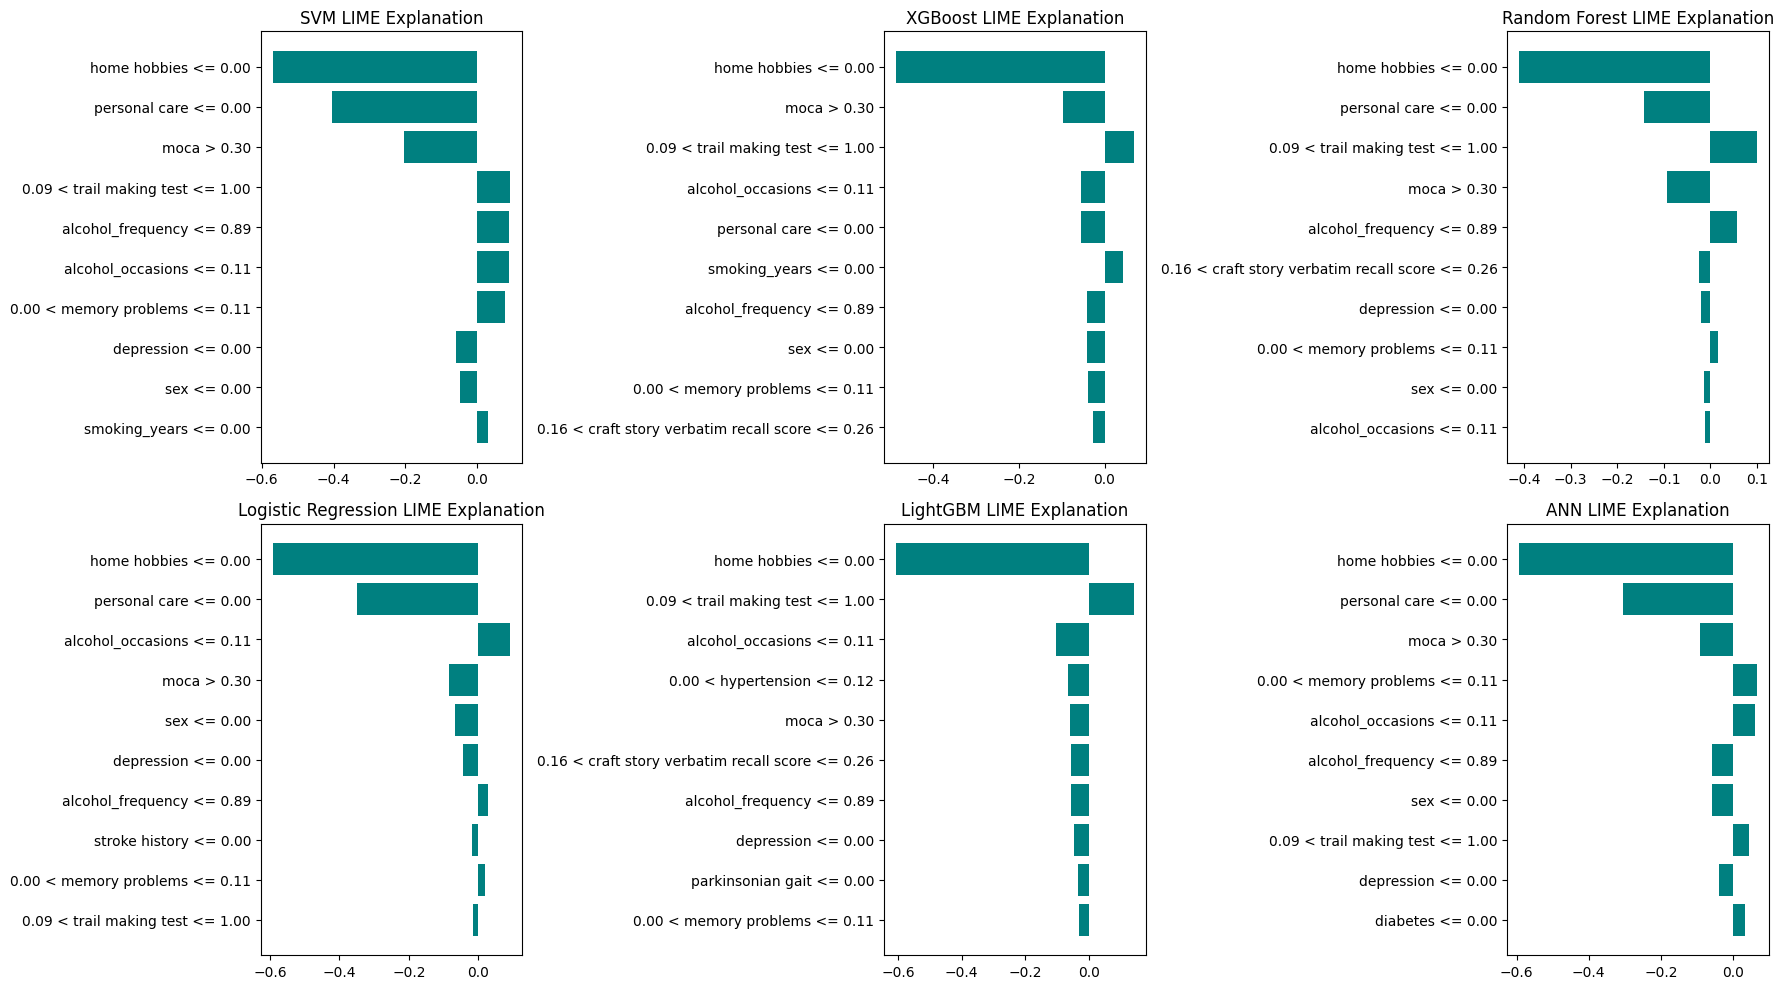

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd

# Define your feature names
feature_names = [
    'age', 'sex', 'education',
    'hypertension', 'diabetes', 'depression', 'stroke history',
    'craft story verbatim recall score', 'moca', 'trail making test',
    'smoking_years', 'alcohol_occasions', 'alcohol_frequency',
    'memory problems', 'home hobbies', 'personal care', 'parkinsonian gait'
]
class_names = ['No Dementia', 'Dementia']

# Convert validation set to DataFrames for consistency
X_val_df = pd.DataFrame(X_val, columns=feature_names)
y_val_df = pd.Series(y_val)

# Pick a sample instance to explain
X_sample = X_val_df.sample(n=1, random_state=42).iloc[0] #Picking a random sample of validation set
y_sample = y_val_df.iloc[0]

# Use resampled training data (assuming you did something like SMOTE before)
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=feature_names)
X_train_resampled_np = X_train_resampled_df.values

#Building again the ANN model
input_dim = X_train_resampled.shape[1]
ann_model = build_ann_model(input_dim=input_dim)

# Initialize LIME explainer with resampled training data
explainer = LimeTabularExplainer(
    training_data=X_train_resampled_np,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification', #Classification task
    discretize_continuous=True,#Discretize continuous features
    verbose=False
)

# Ensure your models support predict_proba
models = {
    "SVM": svm_model,
    "XGBoost": xgb_model,
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "LightGBM": lgbm_model,
    "ANN": lambda x: np.hstack([
        1 - ann_model.predict(x, verbose=0),
        ann_model.predict(x, verbose=0)
    ])
}

# Plot explanations
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, (name, model) in enumerate(models.items()):
    # If model is a function (like the ANN lambda), use it as is
    predict_fn = model if callable(model) else model.predict_proba

    # Explain instance
    exp = explainer.explain_instance(
        data_row=X_sample.values,
        predict_fn=predict_fn,
        num_features=10
    )

    # Create horizontal bar plot from explanation
    weights = dict(exp.as_list())
    sorted_weights = dict(sorted(weights.items(), key=lambda item: abs(item[1]), reverse=True))
    #Features with positive weight push toward to "Dementia" , otherwise (negative weight features) push toward to "No dementia"
    axs[i].barh(list(sorted_weights.keys()), list(sorted_weights.values()), color='teal')
    axs[i].set_title(f"{name} LIME Explanation")
    axs[i].invert_yaxis()

plt.tight_layout()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


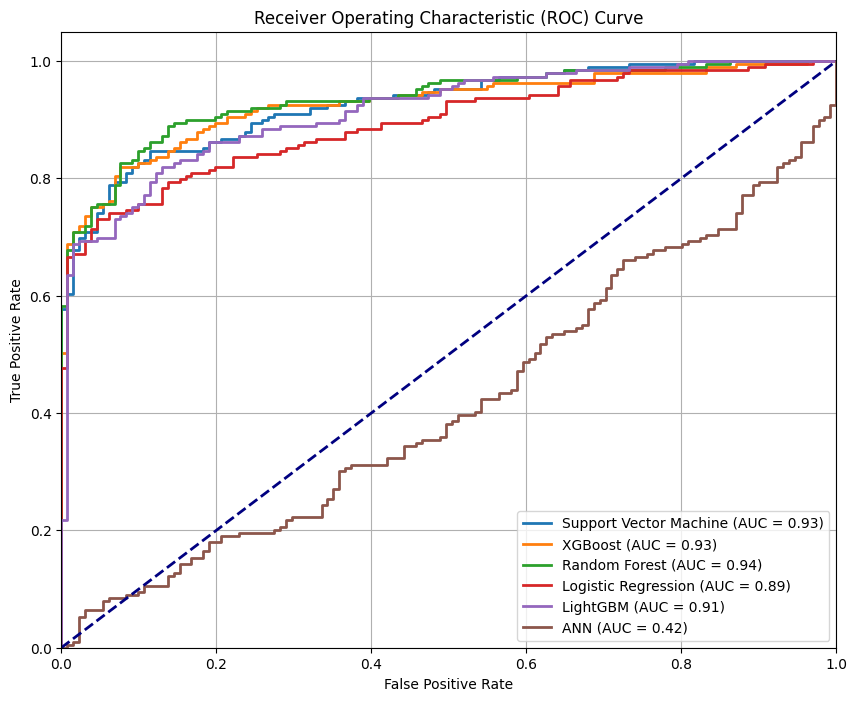

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

input_dim = X_train_resampled.shape[1]
ann_model = build_ann_model(input_dim=input_dim)

models = {
    'Support Vector Machine': svm_model,
     'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'LightGBM': lgbm_model,
    'ANN': ann_model
}


plt.figure(figsize=(10, 8))
performance_metrics = {}


for model_name, model in models.items():

    if model_name == 'ANN':
        y_probs = model.predict(X_test)
    else:
        model.fit(X_train_resampled,y_train_resampled)
        y_probs = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    performance_metrics[model_name] = {'fpr': fpr,'tpr': tpr,'roc_auc': roc_auc}
    plt.plot(fpr, tpr, lw=2,label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()